<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="150px" height="90px" />

## Microestructuras y sistemas de trading

### Laboratorio 1. Administración Pasiva vs Administración Activa.

>##### Luis Ontaneda
>##### Antonio Tirado
>##### Pablo Vargas
>##### Oscar Villa

### Objetivo:

Para la resolución de este primer laboratorio, el objetivo consta de replicar un ETF en forma directa para una junta directiva.

En este proyecto, nos enfocaremos en el ETF "DVY", que se compone de un índice con una ponderación de alrededor de 100 activos que cumplen con el perfil de "alto dividendo".

Trataremos de replicar el comportamiento de DVY, evaluando 12 escenarios diferentes. Cada escenario contara con un solo rebalanceo en un mes diferente en el periodo de Marzo17-Marzo18. Este rebalanceo se realizará con los pesos reales en el tiempo estudiado. 
Los datos con los cuales cuenta este proyecto se obtuvieron de ishares y Quandle. 

Cabe señalar que por disponibilidad de los datos en algunos meses se eiminan algunas acciones que componen DVY pero esto no afecta el análisis de los resultados. 
Mediante un análisis de índices atribuidos al desempeño trataremos de concluir cual de los 12 escenarios hubiera sido el mejor.

Importamos librerias

In [34]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import date
%matplotlib inline
quandl.ApiConfig.api_key = 'riVhxyiwNtvu-2DbzJsD'

Descargamos el nombre de los tickers para poder conseguir los precios de cada activo facilmente

In [35]:
tw = pd.read_csv("DVY_holdingsMAR17.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw1 = pd.read_csv("DVY_holdingsApr.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw2 = pd.read_csv("DVY_holdingsMay.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw3 = pd.read_csv("DVY_holdingsJun.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw4 = pd.read_csv("DVY_holdingsJul.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw5 = pd.read_csv("DVY_holdingsAgo.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw6 = pd.read_csv("DVY_holdingsSep.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw7 = pd.read_csv("DVY_holdingsOct.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw8 = pd.read_csv("DVY_holdingsNov.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw9 = pd.read_csv("DVY_holdingsDic.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw10 = pd.read_csv("DVY_holdingsEne.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw11 = pd.read_csv("DVY_holdingsFeb.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tws = [tw,tw1,tw2,tw3,tw4,tw5,tw6,tw7,tw8,tw9,tw10,tw11]

In [36]:
tw = pd.read_csv("DVY_holdingsMAR17.csv",usecols=[1],nrows=4).dropna()
tw1 = pd.read_csv("DVY_holdingsApr.csv",usecols=[1],nrows=4).dropna()
tw2 = pd.read_csv("DVY_holdingsMay.csv",usecols=[1],nrows=4).dropna()
tw3 = pd.read_csv("DVY_holdingsJun.csv",usecols=[1],nrows=4).dropna()
tw4 = pd.read_csv("DVY_holdingsJul.csv",usecols=[1],nrows=4).dropna()
tw5 = pd.read_csv("DVY_holdingsAgo.csv",usecols=[1],nrows=4).dropna()
tw6 = pd.read_csv("DVY_holdingsSep.csv",usecols=[1],nrows=4).dropna()
tw7 = pd.read_csv("DVY_holdingsOct.csv",usecols=[1],nrows=4).dropna()
tw8 = pd.read_csv("DVY_holdingsNov.csv",usecols=[1],nrows=4).dropna()
tw9 = pd.read_csv("DVY_holdingsDic.csv",usecols=[1],nrows=4).dropna()
tw10 = pd.read_csv("DVY_holdingsEne.csv",usecols=[1],nrows=4).dropna()
tw11 = pd.read_csv("DVY_holdingsFeb.csv",usecols=[1],nrows=4).dropna()
numacc = [tw,tw1,tw2,tw3,tw4,tw5,tw6,tw7,tw8,tw9,tw10,tw11]

In [37]:
tasa = pd.read_csv("Yield.csv",usecols=[1]).apply(lambda x: x/100)

Funcion para bajar precios

In [38]:
def rend(tw,m,y):
    data = quandl.get_table('WIKI/PRICES', ticker = [tw.iloc[:,0].values], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': date(year = y, month = m, day = 1), 'lte': '2018-03-01' }, 
                        paginate=True)
    
    data = data.pivot(index="date",columns="ticker",values="adj_close")
    ret = data.apply(lambda x: np.log(x/x.shift(1)).dropna()).fillna(0)
    
    return data.fillna(0),ret

In [39]:
def peso(tickerstotales,tickerscapturados):
    mt = np.setdiff1d(tickerstotales.iloc[:,0],tickerscapturados.columns)
    newtw = tickerstotales
    for i in range(len(tickerstotales)):
        for j in mt:
            if j == tickerstotales.iloc[i,0]:
                newtw = newtw.drop(i)     
    return newtw.sort_values("Ticker").reset_index(drop=True)

In [40]:
def rebalanceo(tws,año):
    meses = np.arange(3,13)
    if año == 2017:
        xmes = [rend(tws[i],meses[i],año) for i in range(len(meses))]
        xmes1 = [xmes[i][0] for i in range(len(xmes))]
        retmes = [xmes[i][1] for i in range(len(xmes))]
        xpeso = [peso(tws[i],xmes1[i]) for i in range(len(meses))]
    else:
        xmes = [rend(tws[i+8],i,año) for i in range(1,3)]
        xmes1 = [xmes[i][0] for i in range(len(xmes))]
        retmes = [xmes[i][1] for i in range(len(xmes))]
        xpeso = [peso(tws[i+8],xmes1[i]) for i in range(len(xmes))]
    
    return xmes1,xpeso,retmes

In [41]:
def mes(x):
    for i in range(len(x)):
        x[i]['date'] = x[i].index
    
    kxmes = [x[i].groupby(pd.Grouper(key='date', freq='M')) for i in range(len(x))]
    kxmes = [[kxmes[i].get_group(x) for x in kxmes[i].groups] for i in range(len(kxmes))]
    kxmes = [[i[j].drop("date",axis=1) for j in range(len(i))] for i in kxmes]
    
    return kxmes

Sacamos nav diarios multiplicando acciones por precio

In [42]:
def navdia(tw,rendtw,numacc):
    f = [[float(j.iloc[i,2].replace(",","")) for i in range(len(j))] for j in tw[1]]
    dot = [[[np.dot(f[k],z.iloc[i,:]) for i in range(len(z))] for z in rendtw[k]] 
           for k in range(len(rendtw))]
    k = [float(numacc[i].iloc[3,0].replace(",","")) for i in range(len(numacc))]
    n=[[[x/k[j] for x in y] for y in dot[j]] for j in range(len(dot))]
    
    return n

Funcion para sacar cada rendimiento de mes

In [43]:
rendcadanav = lambda x: [[j[i][-1]/j[i][0]-1 for i in range(len(j))] for j in x]

Funcion para rendimientos diarios

In [44]:
rendcadanavdia = lambda x: [[[j[i][k]/j[i][k-1]-1 for k in range(1,len(j[i]))] for i in range(len(j))] for j in x]

In [45]:
v = lambda x: [[np.std(j[i]) for i in range(len(j))] for j in rendnavsdia]

In [46]:
def navmes(tws,numacc):
    f = [[float(j.iloc[i,3].replace(",","")) for i in range(len(j))] for j in tws]
    f = [sum(i) for i in f]
    y = [float(numacc[i].iloc[3,0].replace(",","")) for i in range(len(numacc))]
    n = [f[i]/y[i] for i in range(len(f))]
    
    return n

In [47]:
def media(kxmes):
    mediaxmes = [[np.mean(kxmes[j][i]) for i in range(len(kxmes[j]))] for j in range(len(kxmes))]
    return mediaxmes

In [48]:
def vol(nav):
    nav = [[j for i in nav[x] for j in i] for x in range(len(nav))]
    v = [[np.std(i) for i in j] for j in nav]
    return v

In [49]:
def rendxpeso(mediaxmes,tw):
    x =[[sum(np.multiply(tw[1][j].iloc[:,1],mediaxmes[j][i])) 
          for i in range(len(mediaxmes[j]))] for j in range(len(mediaxmes))]
    return x

In [50]:
def grafica(x,y):
    plt.plot(np.arange(len(r[0])),r[0][0:x] + r[x],label=y)
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Valores esperados")
    plt.xlabel("Tiempo")
    plt.ylabel("E[Rp]")
    
    return

In [51]:
def graficanav(x,y):
    plt.plot(np.arange(len(rendnavsmes[x])),rendnavsmes[x],label=y)
    plt.legend()
    plt.title("Rendimientos")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Tiempo")
    plt.ylabel("Rend")
    
    return

Sacamos el ratio sharpe

In [52]:
def sharpe(rend,tasa,vol):
    return [[(rend[i][j]-tasa.iloc[j][0])/vol[i][j] for j in range(len(rend[i]))] for i in range(len(rend))]

In [53]:
def rendimientos(x):
    rebalanceo = r[0][0:x] + r[x]
    
    j = 'Rebalanceo tiempo '+str(x)
    if x == 0:
        return pd.DataFrame({'Sin rebalanceo': r[0]})
    
    else:
        return pd.DataFrame({'Sin rebalanceo': r[0], j: rebalanceo})

Se combinan valores para poder comparar rebalanceo

In [54]:
combinar = lambda x,y: x[0][0:y] + x[y]

In [55]:
def tabla(rend,vol,sh,n):
    return pd.DataFrame({'Rendimiento': rend[n], "vol":vol[n],"Sharpe":sh[n]})

Acomodamos para que quede la fecha como indice y los precios de los activos en cada columna

In [56]:
tw2017 = rebalanceo(tws,2017)
tw2018 = rebalanceo(tws,2018)

In [57]:
rtw2017 = tw2017[2]
rtw2018 = tw2018[2]

In [58]:
mestw2017 = mes(tw2017[0])
mestw2018 = mes(tw2018[0])

In [59]:
navdiario2017 = navdia(tw2017,mestw2017,numacc)
navdiario2018 = navdia(tw2018,mestw2018,numacc)

In [60]:
navdiario = navdiario2017 + navdiario2018

In [61]:
for i in navdiario:
    i.pop()

In [62]:
navdiario =[combinar(navdiario,i) for i in range(len(navdiario))]

In [63]:
rendnavsmes = rendcadanav(navdiario)

In [64]:
rendnavsdia = rendcadanavdia(navdiario)

In [65]:
volxmes = v(rendnavsdia)

In [66]:
k = [[i for j in k for i in j] for k in rendnavsdia]

In [67]:
volanual = [np.std(i) for i in k]

In [68]:
sh = sharpe(rendnavsmes,tasa,volxmes)

In [69]:
rendanualnav=[navdiario[i][-1][-1]/navdiario[i][0][0]-1 for i in range(len(navdiario))]

In [70]:
shanual = [(rendanualnav[i]-tasa.iloc[-1][0])/volanual[i] for i in range(len(rendanualnav))]

,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan 2018,Feb 2018
NO rebalanceo Marzo 2017,-0.014955,0.005786,0.012194,-0.002983,0.001854,-0.007350,0.017543,0.008664,0.041079,0.005618,0.017333,-0.041618
Rebalanceo Abril 2017,-0.014955,0.005793,0.012209,-0.002987,0.001844,-0.007345,0.017544,0.008664,0.041080,0.005623,0.017345,-0.041615
Rebalanceo Mayo 2017,-0.014955,0.005786,0.012214,-0.002973,0.001848,-0.007359,0.017557,0.008653,0.041092,0.005641,0.017356,-0.041636
Rebalanceo Junio 2017,-0.014955,0.005786,0.012194,-0.002960,0.001840,-0.007398,0.017547,0.008648,0.041099,0.005632,0.017357,-0.041618
Rebalanceo Julio 2017,-0.014955,0.005786,0.012194,-0.002983,0.001852,-0.007394,0.017558,0.008648,0.041102,0.005639,0.017348,-0.041638
Rebalanceo Agosto 2017,-0.014955,0.005786,0.012194,-0.002983,0.001854,-0.007397,0.017569,0.008642,0.041108,0.005652,0.017352,-0.041651
Rebalanceo Septiembre 2017,-0.014955,0.005786,0.012194,-0.002983,0.001854,-0.007350,0.020474,0.008627,0.041107,0.005645,0.017355,-0.041641
Rebalanceo Octubre 2017,-0.014955,0.005786,0.012194,-0.002983,0.001854,-0.007350,0.017543,0.008626,0.041113,0.005659,0.017359,-0.041658
Rebalanceo Noviembre 2017,-0.014955,0.005786,0.012194,-0.002983,0.001854,-0.007350,0.017543,0.008664,0.039847,0.006248,0.017495,-0.042018
Rebalanceo Diciembre 2017,-0.014955,0.005786,0.012194,-0.002983,0.001854,-0.007350,0.017543,0.008664,0.041079,0.006264,0.017518,-0.042005


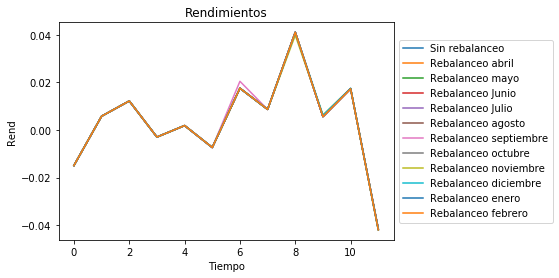

In [71]:

df = pd.DataFrame({'NO rebalanceo Marzo 2017':rendnavsmes[0]
                    ,'Rebalanceo Abril 2017':rendnavsmes[1]
                   ,'Rebalanceo Mayo 2017':rendnavsmes[2]
                  ,'Rebalanceo Junio 2017':rendnavsmes[3]
                  ,'Rebalanceo Julio 2017':rendnavsmes[4]
                  ,'Rebalanceo Agosto 2017':rendnavsmes[5]
                  ,'Rebalanceo Septiembre 2017':rendnavsmes[6]
                  ,'Rebalanceo Octubre 2017':rendnavsmes[7]
                  ,'Rebalanceo Noviembre 2017':rendnavsmes[8]
                  ,'Rebalanceo Diciembre 2017':rendnavsmes[9]  
                  ,'Rebalanceo Enero 2018':rendnavsmes[10]
                  ,'Rebalanceo Febrero 2018':rendnavsmes[11]})
index_ = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec ", "Jan 2018","Feb 2018"] 

#index_ = ('Marzo 2017', 'Abril 2017','Mayo 2017','Junio 2017','Julio 2017','Agosto 2017','Septiembre 2017','Octubre 2017','Noviembre 2017','Diciembre 2017','Enero 2018','Febrero 2018') 
df.index = index_ 

graficanav(0,"Sin rebalanceo"),graficanav(1,"Rebalanceo abril"),graficanav(2,"Rebalanceo mayo"),graficanav(3,"Rebalanceo Junio"),graficanav(4,"Rebalanceo Julio"),graficanav(5,"Rebalanceo agosto"),graficanav(6,"Rebalanceo septiembre"),graficanav(7,"Rebalanceo octubre"),graficanav(8,"Rebalanceo noviembre"),graficanav(9,"Rebalanceo diciembre"),graficanav(10,"Rebalanceo enero"),graficanav(11,"Rebalanceo febrero")

df.transpose()


In [72]:

df = pd.DataFrame({'NO rebalanceo Marzo 2017':sh[0]
                    ,'Rebalanceo Abril 2017':sh[1]
                   ,'Rebalanceo Mayo 2017':sh[2]
                  ,'Rebalanceo Junio 2017':sh[3]
                  ,'Rebalanceo Julio 2017':sh[4]
                  ,'Rebalanceo Agosto 2017':sh[5]
                  ,'Rebalanceo Septiembre 2017':sh[6]
                  ,'Rebalanceo Octubre 2017':sh[7]
                  ,'Rebalanceo Noviembre 2017':sh[8]
                  ,'Rebalanceo Diciembre 2017':sh[9]  
                  ,'Rebalanceo Enero 2018':sh[10]
                  ,'Rebalanceo Febrero 2018':sh[11]})


c = [['NO rebalanceo Marzo 2017','Rebalanceo Abril 2017','Rebalanceo Mayo 2017','Rebalanceo Junio 2017','Rebalanceo Julio 2017',
      'Rebalanceo Agosto 2017','Rebalanceo Septiembre 2017','Rebalanceo Octubre 2017','Rebalanceo Noviembre 2017',
      'Rebalanceo Diciembre 2017','Rebalanceo Enero 2018','Rebalanceo Febrero 2018']]

index_ = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec ", "Jan 2018","Feb 2018"] 

#index_ = ('Marzo 2017', 'Abril 2017','Mayo 2017','Junio 2017','Julio 2017','Agosto 2017','Septiembre 2017','Octubre 2017','Noviembre 2017','Diciembre 2017','Enero 2018','Febrero 2018') 
df.index = index_ 

df.transpose()

,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan 2018,Feb 2018
NO rebalanceo Marzo 2017,-4.111494,-0.301854,1.244761,-2.517061,-1.777430,-3.718155,2.386147,-0.295289,7.435020,-1.316157,0.801461,-3.932313
Rebalanceo Abril 2017,-4.111494,-0.300548,1.248181,-2.517995,-1.780002,-3.718089,2.386870,-0.295424,7.435385,-1.315065,0.803535,-3.932131
Rebalanceo Mayo 2017,-4.111494,-0.301854,1.249193,-2.514870,-1.779173,-3.721706,2.390860,-0.299211,7.436823,-1.310936,0.805331,-3.933412
Rebalanceo Junio 2017,-4.111494,-0.301854,1.244761,-2.511148,-1.780442,-3.725942,2.386273,-0.301059,7.436488,-1.312956,0.805481,-3.931674
Rebalanceo Julio 2017,-4.111494,-0.301854,1.244761,-2.517061,-1.777566,-3.726368,2.390053,-0.300777,7.436647,-1.311136,0.803727,-3.933221
Rebalanceo Agosto 2017,-4.111494,-0.301854,1.244761,-2.517061,-1.777430,-3.727680,2.393434,-0.303026,7.437833,-1.308138,0.804460,-3.934092
Rebalanceo Septiembre 2017,-4.111494,-0.301854,1.244761,-2.517061,-1.777430,-3.718155,3.367249,-0.308235,7.436504,-1.309684,0.804960,-3.933139
Rebalanceo Octubre 2017,-4.111494,-0.301854,1.244761,-2.517061,-1.777430,-3.718155,2.386147,-0.308476,7.437826,-1.306543,0.805661,-3.934409
Rebalanceo Noviembre 2017,-4.111494,-0.301854,1.244761,-2.517061,-1.777430,-3.718155,2.386147,-0.295289,7.121865,-1.163587,0.830913,-3.954016
Rebalanceo Diciembre 2017,-4.111494,-0.301854,1.244761,-2.517061,-1.777430,-3.718155,2.386147,-0.295289,7.435020,-1.159425,0.834776,-3.952462


In [73]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


df = pd.DataFrame({"Sharpe anual":shanual,'nav anual':rendanualnav})
index_ = ["Sin rebalanceo", "rebalanceo Apr", "rebalanceo May", "rebalanceo Jun", "rebalanceo Jul", "rebalanceo Aug", "rebalanceo Sep", "rebalanceo Oct", "rebalanceo Nov", "rebalanceo Dec ", "rebalanceo Jan 2018","rebalanceo Feb 2018"] 

#index_ = ('Marzo 2017', 'Abril 2017','Mayo 2017','Junio 2017','Julio 2017','Agosto 2017','Septiembre 2017','Octubre 2017','Noviembre 2017','Diciembre 2017','Enero 2018','Febrero 2018') 
df.index = index_ 
df.style.apply(highlight_max)

,Sharpe anual,nav anual
Sin rebalanceo,5.29007,0.0515589
rebalanceo Apr,6.22598,0.0570169
rebalanceo May,6.17029,0.0566944
rebalanceo Jun,5.4038,0.0522286
rebalanceo Jul,5.88828,0.0550545
rebalanceo Aug,6.31492,0.0575439
rebalanceo Sep,5.92743,0.0552672
rebalanceo Oct,6.38579,0.0579588
rebalanceo Nov,6.61792,0.0593442
rebalanceo Dec,5.65119,0.0537094


In [74]:
tabla(rendnavsmes,volxmes,sh,10)

,Rendimiento,vol,Sharpe
0,-0.014955,0.004756,-4.111494
1,0.005786,0.005015,-0.301854
2,0.012194,0.004414,1.244761
3,-0.002983,0.004443,-2.517061
4,0.001854,0.004358,-1.777430
5,-0.007350,0.004666,-3.718155
6,0.017543,0.003329,2.386147
7,0.008664,0.002830,-0.295289
8,0.041079,0.004099,7.435020
9,0.005618,0.004393,-1.316157


# Valor esperado

In [75]:
rendmes2017 = mes(rtw2017)
rendmes2018 = mes(rtw2018)

In [76]:
mediaxmes2017=media(rendmes2017)
mediaxmes2018=media(rendmes2018)

In [77]:
volxmes = vol(navdiario)

In [78]:
r2017 = rendxpeso(mediaxmes2017,tw2017)
r2018 = rendxpeso(mediaxmes2018,tw2018)

In [79]:
r = r2017 + r2018

,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan 2018,Feb 2018,Mar 2018
NO rebalanceo Marzo 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.124374,0.0394824,0.18871,-0.00402921,0.0727071,-0.249056,-0.904968
Rebalanceo Abril 2017,-0.0640015,0.0597777,0.0280138,0.0347515,0.024376,-0.0411714,0.121767,0.0413771,0.186124,-0.00375992,0.0673185,-0.250736,-0.933869
Rebalanceo Mayo 2017,-0.0640015,0.0192303,0.062309,0.0304431,0.0238414,-0.0353716,0.112341,0.0443588,0.182388,-0.0088993,0.0659445,-0.249863,-0.92654
Rebalanceo Junio 2017,-0.0640015,0.0192303,0.0253608,-0.0100193,0.0244033,-0.0376475,0.118466,0.0434014,0.186513,-0.00404275,0.0668814,-0.250114,-0.936493
Rebalanceo Julio 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0182673,-0.0332769,0.117339,0.0446897,0.18343,-0.00405618,0.0683036,-0.248948,-0.925012
Rebalanceo Agosto 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0268032,0.110673,0.0491572,0.180516,-0.0103228,0.0668065,-0.248855,-0.892962
Rebalanceo Septiembre 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.115161,0.0488047,0.186159,0.0015433,0.0733826,-0.249722,-0.927707
Rebalanceo Octubre 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.124374,0.0481737,0.186061,0.00183345,0.0733931,-0.25002,-0.930067
Rebalanceo Noviembre 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.124374,0.0394824,0.211864,0.00771,0.0702581,-0.250927,-0.968714
Rebalanceo Dieciembre 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.124374,0.0394824,0.18871,0.0438937,0.0773951,-0.253428,-0.992971


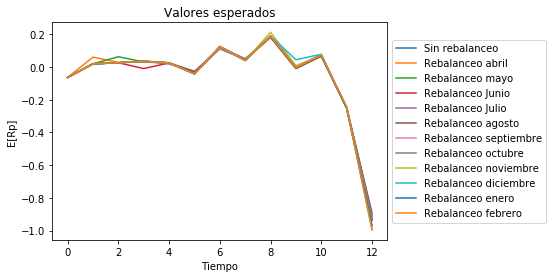

In [80]:
rendrebalan=[rendimientos(i) for i in range (11)]


df = pd.DataFrame({'NO rebalanceo Marzo 2017':rendrebalan[0].iloc[:,0]
                    ,'Rebalanceo Abril 2017':rendrebalan[1].iloc[:,1]
                   ,'Rebalanceo Mayo 2017':rendrebalan[2].iloc[:,1]
                  ,'Rebalanceo Junio 2017':rendrebalan[3].iloc[:,1]
                  ,'Rebalanceo Julio 2017':rendrebalan[4].iloc[:,1]
                  ,'Rebalanceo Agosto 2017':rendrebalan[5].iloc[:,1]
                  ,'Rebalanceo Septiembre 2017':rendrebalan[6].iloc[:,1]
                  ,'Rebalanceo Octubre 2017':rendrebalan[7].iloc[:,1]
                  ,'Rebalanceo Noviembre 2017':rendrebalan[8].iloc[:,1]
                  ,'Rebalanceo Dieciembre 2017':rendrebalan[9].iloc[:,1]
                   
                  ,'Rebalanceo Enero 2017':rendrebalan[10].iloc[:,1]})
index_ = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan 2018", "Feb 2018","Mar 2018"] 
#index_ = ('Marzo 2017', 'Abril 2017','Mayo 2017','Junio 2017','Julio 2017','Agosto 2017','Septiembre 2017','Octubre 2017','Noviembre 2017','Diciembre 2017','Enero 2018','Febrero 2018') 
df.index = index_ 

grafica(0,"Sin rebalanceo"),grafica(1,"Rebalanceo abril"),grafica(2,"Rebalanceo mayo"),grafica(3,"Rebalanceo Junio"),grafica(4,"Rebalanceo Julio"),grafica(5,"Rebalanceo agosto"),grafica(6,"Rebalanceo septiembre"),grafica(7,"Rebalanceo octubre"),grafica(8,"Rebalanceo noviembre"),grafica(9,"Rebalanceo diciembre"),grafica(10,"Rebalanceo enero"),grafica(11,"Rebalanceo febrero")

df.transpose().style


# Creamos nuestro portafolio, con nuestros pesos

In [81]:
w = [np.random.random(len(rtw2017[0].drop("date",axis=1).columns)) for i in range(1000)]
sw = [sum(i) for i in w]
w = list(map(lambda x,y: x/y,w,sw))
media = rtw2017[0].mean()
varianza = rtw2017[0].var()
desvest = rtw2017[0].std()
cov = rtw2017[0].cov()

In [82]:
wret = [[sum(media*i),np.sqrt(np.dot(np.transpose(i), np.dot(cov, i))),i] for i in w]
port = pd.DataFrame(wret,columns = ["E[Rp]","Sigma","W"])

Text(0,0.5,'E[Rp]')

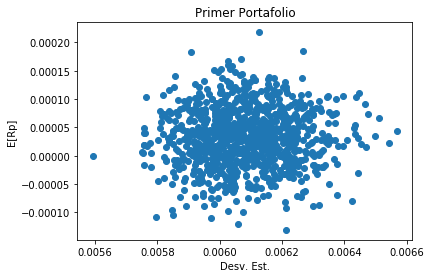

In [83]:
plt.plot(port.iloc[:,1],port.iloc[:,0],"o")
plt.title("Primer Portafolio")
plt.xlabel("Desv. Est.")
plt.ylabel("E[Rp]")

In [84]:
port["Sharpe"] = list(map(lambda x,y: x/y,port.iloc[:,0],port.iloc[:,1]))

In [85]:
min_volatility = port['Sigma'].min()
max_sharpe = port['Sharpe'].max()

sharpe_portfolio = port.loc[port['Sharpe'] == max_sharpe]
min_variance_port = port.loc[port['Sigma'] == min_volatility]

In [86]:
sharpe_portfolio

,E[Rp],Sigma,W,Sharpe
115,0.000218,0.006126,"[0.0060802454874267255, 0.001396536137252103, ...",0.035574


Text(0.5,1,'Efficient Frontier')

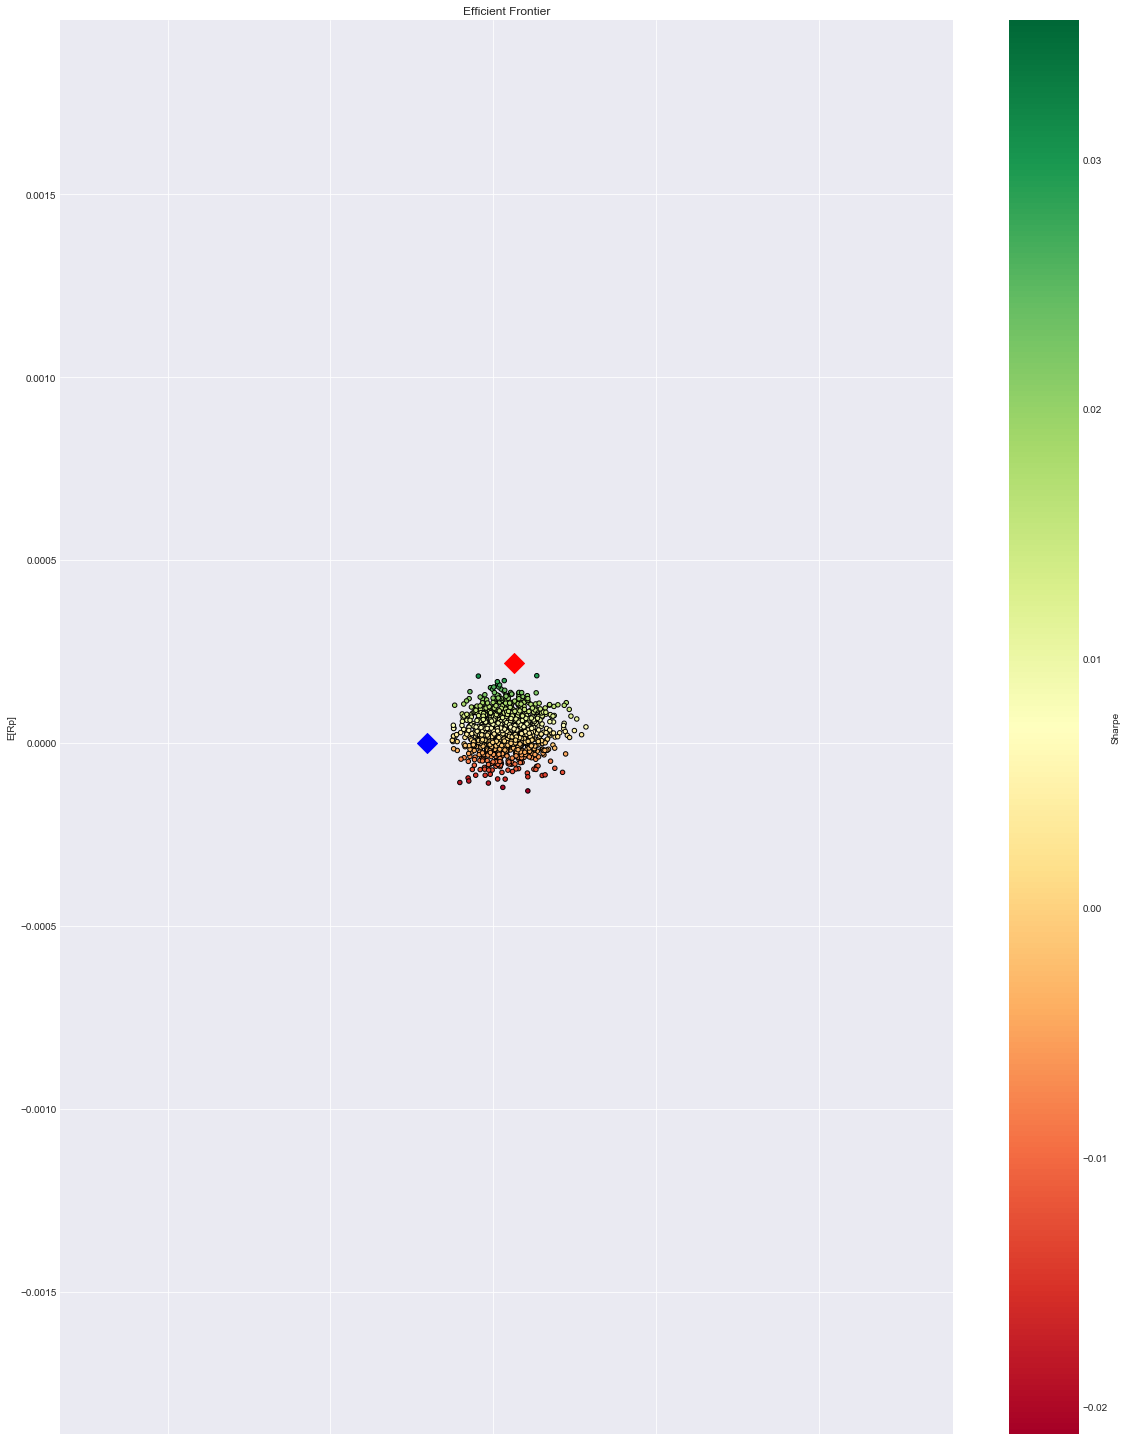

In [89]:
plt.style.use('seaborn-dark')
port.plot.scatter(x='Sigma', y='E[Rp]', c='Sharpe',
                cmap='RdYlGn', edgecolors='black' ,figsize=(20, 26), grid=True)
plt.scatter(x=sharpe_portfolio['Sigma'], y=sharpe_portfolio["E[Rp]"], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Sigma'], y=min_variance_port["E[Rp]"], c='blue', marker='D', s=200 )
plt.xlabel('Desv. Est.')
plt.ylabel('E[Rp]')
plt.title('Efficient Frontier')

In [90]:
menor = sharpe_portfolio
w = menor.iloc[:,2]
w

115    [0.0060802454874267255, 0.001396536137252103, ...
Name: W, dtype: object

### Conclusión

Con base en los resultados, podemos observar que, bajo el supuesto con el que se trabajó, el mejor momento para haber rebalanceado el ETF fue el mes de Noviembre, ya que la estrategia de "buy & hold" hubiera tenido un rendimiento muy cercano al 6%, mientras que el resto de los escenarios se presentan más cercanos al 5%, además observamos también que el Sharpe de ese rebalanceo es el mayor, por lo que podemos decir que es el mejor rendimiento ajustado al riesgo asumido.

En cuanto a la propuesta que el equipo otorga a la mesa de directivos, se decidió proponer una ponderación con base en la teoría de Markowitz, tomando como parámetro la ponderación del primer rebalanceo, para que ésta se ajuste al nivel de riesgo que se proponga por la mesa directiva.